In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Sim_FinalProject_FerryTraffic/Huyen/Final_Dataset/ archive1/Jamestown.csv'
df = pd.read_csv(file_path)

columns_to_remove = ['TRAILER', 'BUS', 'TRUCK', 'PED/BYC']
cleaned_data = df.drop(columns=columns_to_remove, errors='ignore')

df



,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63129,71275,71243,2024-08-31,Saturday,E,18:40,24.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN
63130,71276,71244,2024-08-31,Saturday,E,19:30,24.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN
63131,71277,71245,2024-08-31,Saturday,E,20:30,0.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN
63132,71278,71279,2024-08-31,Saturday,E,21:30,0.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN


In [ ]:
cloud_ranking_with_nan = {
    'Clear': 1,
    'Partly Cloudy': 2,
    'Overcast': 3,
    None: 0,
    float('nan'): 0  # Explicit handling of NaN
}

# Update the ranking column to handle NaN as 0
df['Clouds_Rank'] = df['Clouds:'].map(cloud_ranking_with_nan).fillna(0)

df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2


In [ ]:

unique_precipitation = df['Precipitation:'].unique()

# Define a ranking for the precipitation conditions
precipitation_ranking = {
    'None': 1,
    'Light Rain': 2,
    'Rain': 3,
    'Thunderstorms': 4,
    None: 0,
    float('nan'): 0
}

# Map the ranking to the column and handle NaN values
df['Precipitation_Rank'] = df['Precipitation:'].map(precipitation_ranking).fillna(0)

df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0


In [ ]:
# Define a ranking for the wind conditions
wind_ranking = {
    '0 - 10 mph': 5,
    '10 - 15 mph': 12.5,
    '15 - 20 mph': 17.5,
    '20 - 25 mph': 22.5,
    '25 - 30 mph': 27.5,
    '30 - 35 mph': 32.5,
    None: 0,
    float('nan'): 0  # Explicit handling of NaN
}

# Map the ranking to the column and handle NaN values
df['Wind_Rank'] = df['Wind:'].map(wind_ranking).fillna(0)

df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0


In [ ]:
# Define a ranking for the temperature conditions
temperature_ranking = {
    'Warm (60 - 80)': 60,
    'Hot (> 80)': 80,
    'Cool (40 - 60)': 40,
    'Cold (< 40)': 20,
    None: 0,
    float('nan'): 0
}

# Map the ranking to the column and handle NaN values
df['Temperature_Rank'] = df['Temperature:'].map(temperature_ranking).fillna(0)


df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,...,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60


In [ ]:
# Convert the 'Holiday' column to binary: 0 for missing, 1 for any value
df['Holiday_Binary'] = df['Holiday'].notna().astype(int)

df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,...,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0


In [ ]:
import numpy as np

# Calculate TOTAL_2 based on the condition
df['TOTAL_2'] = np.where(df['TOTAL'] > 70, df['TOTAL'], df['TOTAL'] + df['LOD'])

df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,...,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2
0,0,0,2021-06-01,Tuesday,A,1:00,1.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,1.0
1,1,33,2021-06-01,Tuesday,A,2:00,1.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,1.0
2,2,34,2021-06-01,Tuesday,A,3:00,2.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,2.0
3,3,35,2021-06-01,Tuesday,A,4:00,14.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,14.0
4,4,36,2021-06-01,Tuesday,A,5:20,17.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,17.0


In [ ]:
# Convert time strings to floats
def time_to_float(time_str):
    if pd.isna(time_str):
        return None
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60

df['Hour_float'] = df['Hour'].apply(time_to_float)



In [ ]:
# Sort the DataFrame by 'Date' and then by 'Hour_float' within each day
df = df.sort_values(by=['Date', 'Hour_float']).reset_index(drop=True)


In [ ]:
df[['Date', 'Shift', 'Hour', 'Hour_float']]


,Date,Shift,Hour,Hour_float
0,2021-06-01,D,00:00,0.0
1,2021-06-01,A,1:00,1.0
2,2021-06-01,A,2:00,2.0
3,2021-06-01,A,3:00,3.0
4,2021-06-01,A,4:00,4.0
...,...,...,...,...
63129,2024-08-31,D,21:00,21.0
63130,2024-08-31,E,21:30,21.5
63131,2024-08-31,D,22:00,22.0
63132,2024-08-31,E,22:30,22.5


In [ ]:
# Create a new column 'Previous LOD' that contains the 'LOD' value from the previous row
df['Previous LOD'] = df['LOD'].shift(1)

df[['Date', 'Hour_float', 'LOD', 'Previous LOD']]



,Date,Hour_float,LOD,Previous LOD
0,2021-06-01,0.0,0,NaN
1,2021-06-01,1.0,0,0.0
2,2021-06-01,2.0,0,0.0
3,2021-06-01,3.0,0,0.0
4,2021-06-01,4.0,0,0.0
...,...,...,...,...
63129,2024-08-31,21.0,0,0.0
63130,2024-08-31,21.5,0,0.0
63131,2024-08-31,22.0,0,0.0
63132,2024-08-31,22.5,0,0.0


In [ ]:
# List all columns in the DataFrame
df.columns.tolist()


['Unnamed: 0.1',
 'Unnamed: 0',
 'Date',
 'Weekday',
 'Shift',
 'Hour',
 'TOTAL',
 'TRAILER',
 'BUS',
 'TRUCK',
 'PED/BYC',
 'LOD',
 'Clouds:',
 'Precipitation:',
 'Wind:',
 'Temperature:',
 'Holiday',
 'Clouds_Rank',
 'Precipitation_Rank',
 'Wind_Rank',
 'Temperature_Rank',
 'Holiday_Binary',
 'TOTAL_2',
 'Hour_float',
 'Previous LOD']

In [ ]:
df_feature = df[['Date',
 'Weekday',
 'Clouds_Rank',
 'Precipitation_Rank',
 'Wind_Rank',
 'Temperature_Rank',
 'Holiday_Binary',
 'TOTAL_2',
 'Hour_float',
 'Previous LOD']]

In [ ]:
df_feature

,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,0.0,NaN
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.0,0.0
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,2.0,0.0
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,3.0,0.0
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,14.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
63129,2024-08-31,Saturday,2,0.0,5.0,80,0,31.0,21.0,0.0
63130,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,21.5,0.0
63131,2024-08-31,Saturday,2,0.0,5.0,80,0,35.0,22.0,0.0
63132,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,22.5,0.0


In [ ]:
# Replace all NaN values in the DataFrame with 0
df_feature.fillna(0, inplace=True)

df_feature.head()


<ipython-input-16-e01f9c3d9c05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.fillna(0, inplace=True)


,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,0.0,0.0
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.0,0.0
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,2.0,0.0
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,3.0,0.0
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,14.0,4.0,0.0


In [ ]:
df_feature.to_csv('feature_clean.csv')

In [ ]:
data = df_feature

In [ ]:
data

,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,0.0,0.0
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.0,0.0
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,2.0,0.0
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,3.0,0.0
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,14.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
63129,2024-08-31,Saturday,2,0.0,5.0,80,0,31.0,21.0,0.0
63130,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,21.5,0.0
63131,2024-08-31,Saturday,2,0.0,5.0,80,0,35.0,22.0,0.0
63132,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,22.5,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Drop irrelevant columns and prepare features/target
data_cleaned = data.drop([ 'Date'], axis=1)

# Handle categorical variables (e.g., Weekday)
data_encoded = pd.get_dummies(data_cleaned, columns=['Weekday'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('TOTAL_2', axis=1)
y = data_encoded['TOTAL_2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_metrics = {
    'RMSE': rmse,
    'MAE': mae,
    'R²': r2
}

evaluation_metrics


{'RMSE': 8.42336696196105, 'MAE': 5.486999961910344, 'R²': 0.7566219503012628}

In [ ]:
import pandas as pd

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'coerce' will set invalid parsing as NaT

# Now extract components from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Year'] = data['Date'].dt.dayofyear
data['Week_of_Year'] = data['Date'].dt.isocalendar().week


<ipython-input-21-65d056c9921b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'coerce' will set invalid parsing as NaT
<ipython-input-21-65d056c9921b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
<ipython-input-21-65d056c9921b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
data

,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD,Year,Month,Day,Day_of_Year,Week_of_Year
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,0.0,0.0,2021,6,1,152,22
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.0,0.0,2021,6,1,152,22
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,2.0,0.0,2021,6,1,152,22
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,3.0,0.0,2021,6,1,152,22
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,14.0,4.0,0.0,2021,6,1,152,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63129,2024-08-31,Saturday,2,0.0,5.0,80,0,31.0,21.0,0.0,2024,8,31,244,35
63130,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,21.5,0.0,2024,8,31,244,35
63131,2024-08-31,Saturday,2,0.0,5.0,80,0,35.0,22.0,0.0,2024,8,31,244,35
63132,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,22.5,0.0,2024,8,31,244,35


In [ ]:
data = data.copy()

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract components from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Year'] = data['Date'].dt.dayofyear
data['Week_of_Year'] = data['Date'].dt.isocalendar().week

# Drop the original Date column to avoid issues with datetime format
data_cleaned_with_date = data.drop(['Date'], axis=1)

# One-hot encode categorical variables (e.g., Weekday)
data_encoded = pd.get_dummies(data_cleaned_with_date, columns=['Weekday'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('TOTAL_2', axis=1)
y = data_encoded['TOTAL_2']

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set and re-evaluate
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_metrics_cleaned = {
    'RMSE': rmse,
    'MAE': mae,
    'R²': r2
}

evaluation_metrics_cleaned


{'RMSE': 7.600741004077423, 'MAE': 4.894370591263352, 'R²': 0.8018373356490004}

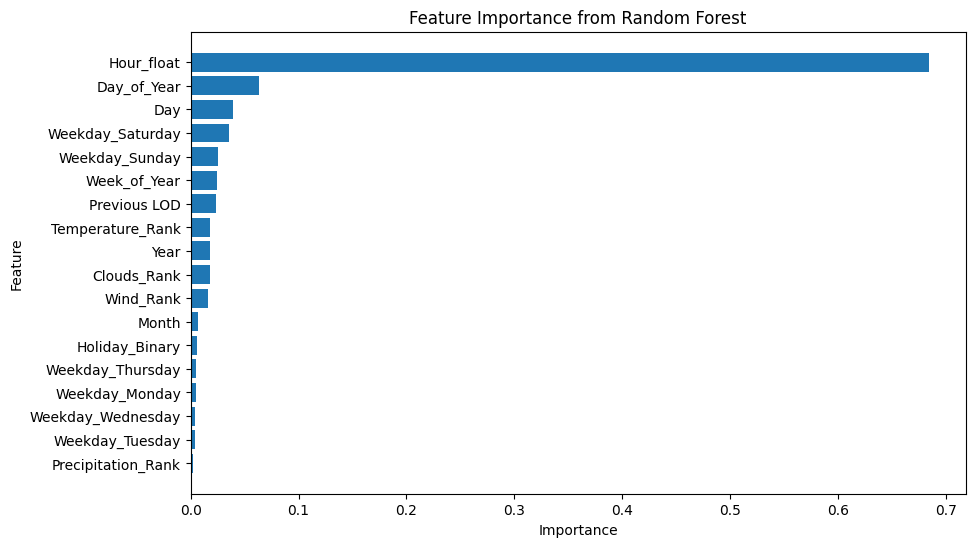

,Feature,Importance
0,Hour_float,0.684268
1,Day_of_Year,0.063256
2,Day,0.038859
3,Weekday_Saturday,0.035107
4,Weekday_Sunday,0.025749
5,Week_of_Year,0.024542
6,Previous LOD,0.023867
7,Temperature_Rank,0.018227
8,Year,0.018158
9,Clouds_Rank,0.018074


In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df.reset_index(drop=True)


In [ ]:
data_cleaned_with_date

,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD,Year,Month,Day,Day_of_Year,Week_of_Year
0,Tuesday,2,0.0,5.0,60,0,6.0,0.0,0.0,2021,6,1,152,22
1,Tuesday,2,0.0,5.0,60,0,1.0,1.0,0.0,2021,6,1,152,22
2,Tuesday,2,0.0,5.0,60,0,1.0,2.0,0.0,2021,6,1,152,22
3,Tuesday,2,0.0,5.0,60,0,2.0,3.0,0.0,2021,6,1,152,22
4,Tuesday,2,0.0,5.0,60,0,14.0,4.0,0.0,2021,6,1,152,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63129,Saturday,2,0.0,5.0,80,0,31.0,21.0,0.0,2024,8,31,244,35
63130,Saturday,2,0.0,5.0,80,0,0.0,21.5,0.0,2024,8,31,244,35
63131,Saturday,2,0.0,5.0,80,0,35.0,22.0,0.0,2024,8,31,244,35
63132,Saturday,2,0.0,5.0,80,0,0.0,22.5,0.0,2024,8,31,244,35


In [ ]:
data_cleaned_with_date.to_csv('/content/drive/MyDrive/Sim_FinalProject_FerryTraffic/Huyen/Final_Dataset/Jamestown.csv')